In [1]:
#SCRIPT TO CREATE THE AUTOMATION FUNCTION
from tools import *

In [2]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [3]:
mpt = mpt_data(path = r"C:\Users\cjang.WILDCAT\Desktop\eis\eis_manager\data\\", data = [csv.iloc[0].name])

No handles with labels found to put in legend.


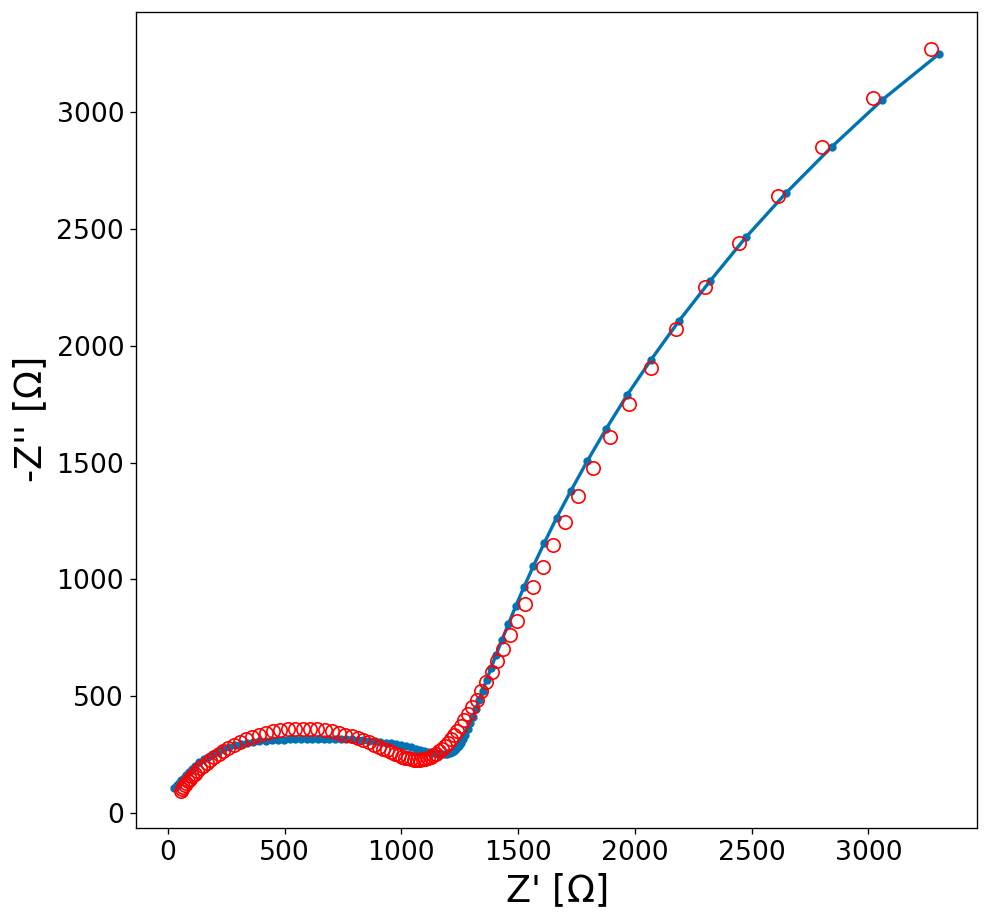

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,copy.mpt,0.026666,5260.15866,1.0,NaN,0.000003,1032.3479,0.731351,NaN,9.954358e-08,0.000056,0.495463


In [4]:
mpt.guesser()

No handles with labels found to put in legend.


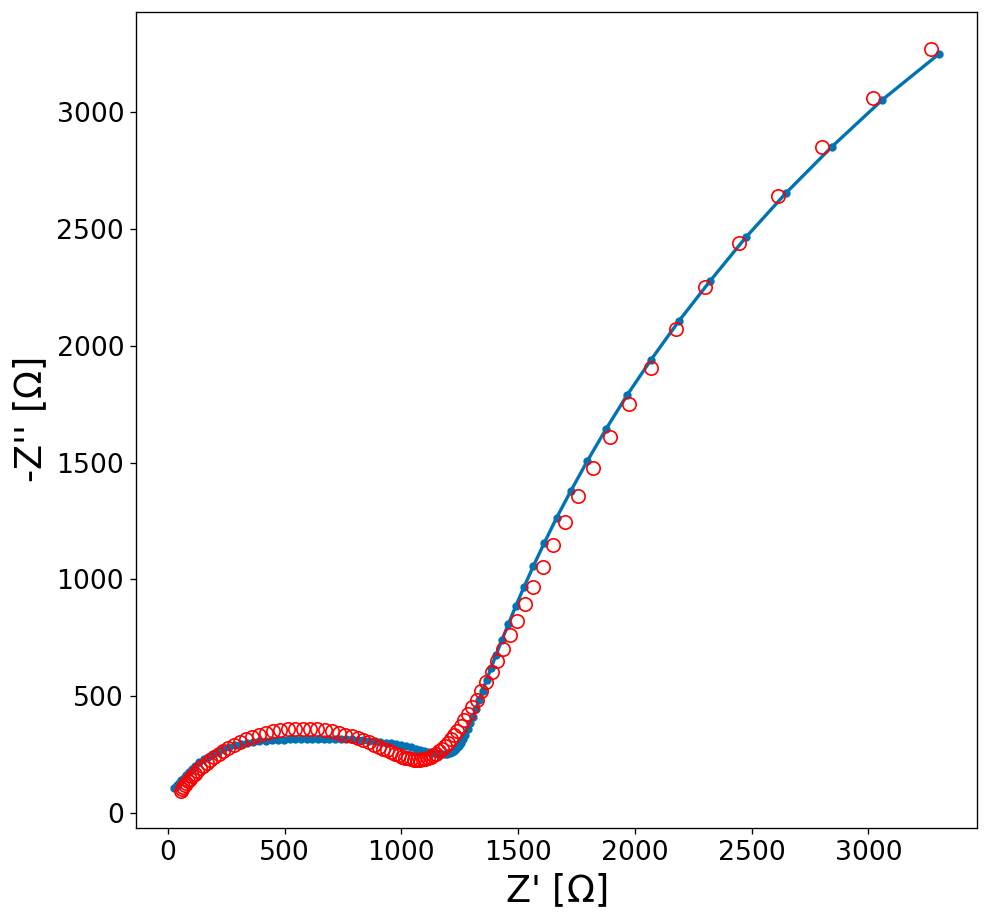

In [5]:
mpt.mpt_plot(fitting = 'on', save_fig = True)

In [6]:
#AUTO FUNCTION
import logging
logging.getLogger().setLevel(logging.CRITICAL)
import math
def auto_fit(path, csv, save_fig = False):
    for i in range(len(csv)):
        #print(i)
        mpt = mpt_data(path = path, data = [csv.iloc[i].name])
        print(mpt.data)
        if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
            mask_choice = mpt.fast_mask()
            masked_mpt = mpt_data(path = path, data = [csv.iloc[i].name], mask = mask_choice)
            #print(len(masked_mpt.df[0]))
            if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                print(masked_mpt.guesser(save_fig = save_fig))
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "2":
                mask_choice = mpt.masker0()
                masked_mpt = mpt_data(path = path, data = [csv.iloc[i].name], mask = mask_choice)
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                print(masked_mpt.guesser(save_fig = save_fig))
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "3":
                mask_choice = mpt.masker()
                masked_mpt = mpt_data(path =  path, data = [csv.iloc[i].name], mask = mask_choice)
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                print(masked_mpt.guesser(save_fig = save_fig))
            elif (csv.iloc[i].mask_choice.strip('[')).strip('];') == "4":
                if type((csv.iloc[i].recal_indices)) == str:
                    #print(csv.iloc[i].recal_indices)
                    pre_inds =(csv.iloc[i].recal_indices.strip('[')).strip(']').split(',') 
                    edited_inds = [int(i) for i in pre_inds]
                    #print(edited_inds)
                    for ind in edited_inds:
                        if ind == "[":
                            continue
                        elif ind == "]":
                            continue
                        else:      
                            if ind in masked_mpt.df[0].index:  
                                mpt.df[0] = mpt.df[0].drop(ind,axis=0)
                            else:
                                continue
                    #print(len(masked_mpt.df[0]))
                else:
                    #print('guessing...')
                    continue
                print(mpt.guesser(save_fig = save_fig))
            else:
                print('bad masking choice')
        else:
            #print([str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')])
            raw_window = [str(i) for i in (csv.iloc[i].mask_choice.strip('[')).strip('];').split(',')]
            #print(mpt.window_masker([raw_window[0],raw_window[1]], [raw_window[2],raw_window[3]]))
            mask_choice = mpt.window_masker([float(raw_window[0]),float(raw_window[1])], [float(raw_window[2]),float(raw_window[3])])
            masked_mpt = mpt_data(path =  path, data = [csv.iloc[i].name], mask = mask_choice)
            #print((str(csv.iloc[i].recal_indices).strip('[')).strip(']'))
            if (str(csv.iloc[i].recal_indices).strip('[')).strip(']') != 'nan':
                pre_inds =(str(csv.iloc[i].recal_indices).strip('[')).strip(']').split(',') 
                #print(pre_inds)
                edited_inds = [int(i) for i in pre_inds]
                #print(edited_inds)
                for ind in edited_inds:
                    if ind == "[":
                        continue
                    elif ind == "]":
                        continue
                    else:      
                        if ind in masked_mpt.df[0].index:  
                            masked_mpt.df[0] = masked_mpt.df[0].drop(ind,axis=0)
                        else:
                            continue
                print(masked_mpt.guesser(save_fig = save_fig))
            else:
                print(masked_mpt.guesser(save_fig = save_fig))
        

['copy.mpt']


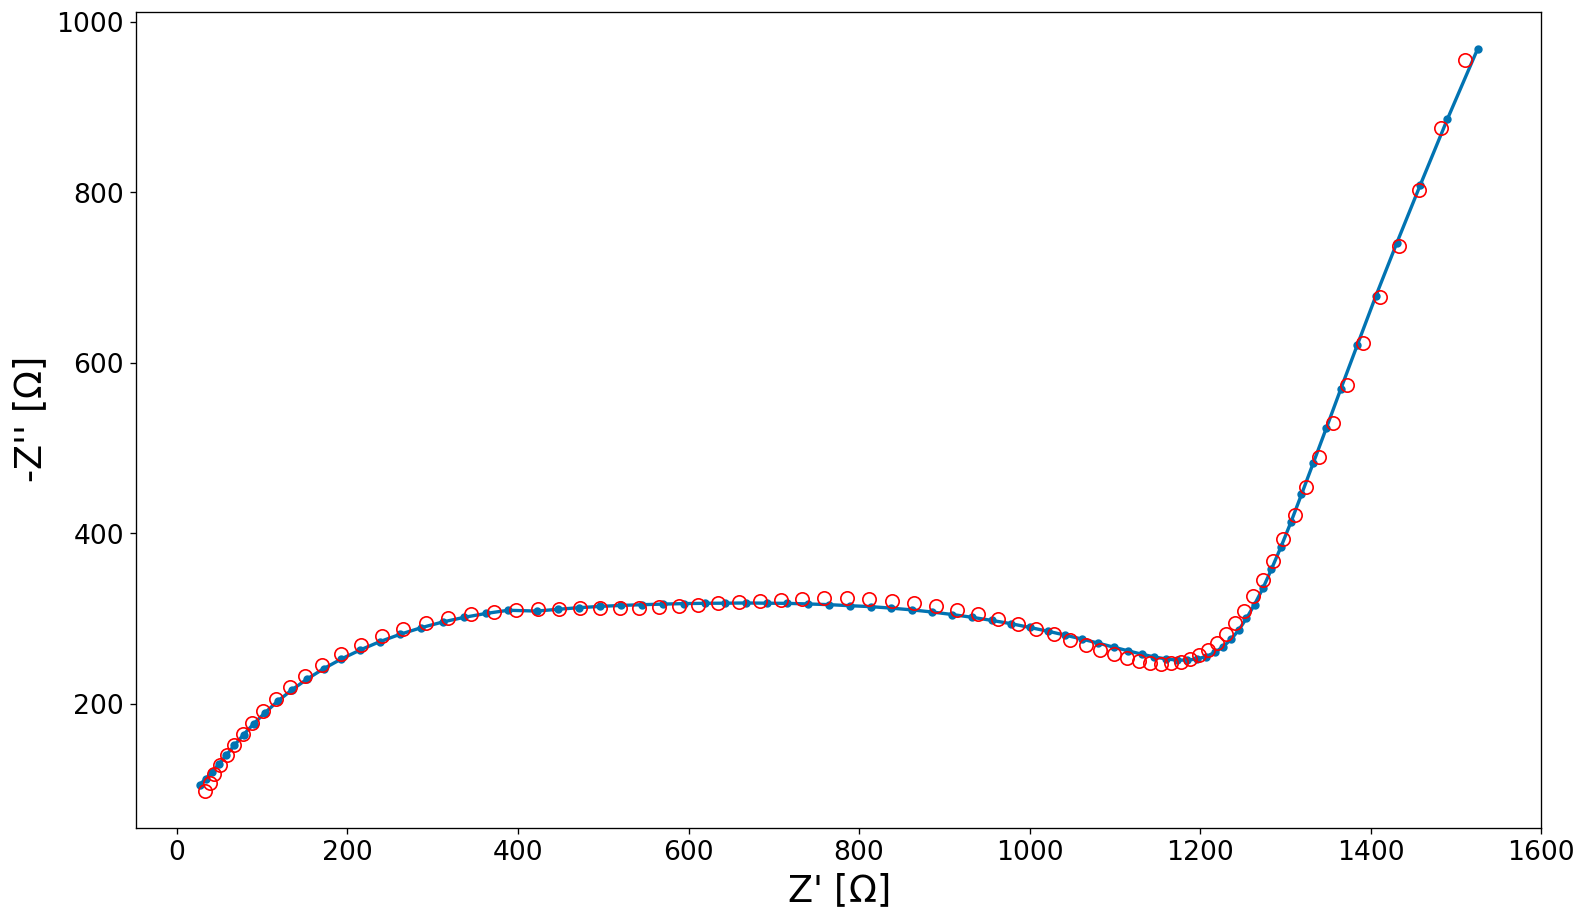

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  copy.mpt  0.026666  474.074418  0.907754      NaN  8.111760e-09   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  732.686336  0.769639      NaN  2.531721e-07  0.000006  0.795361  
['DE_104_10_30.mpt']


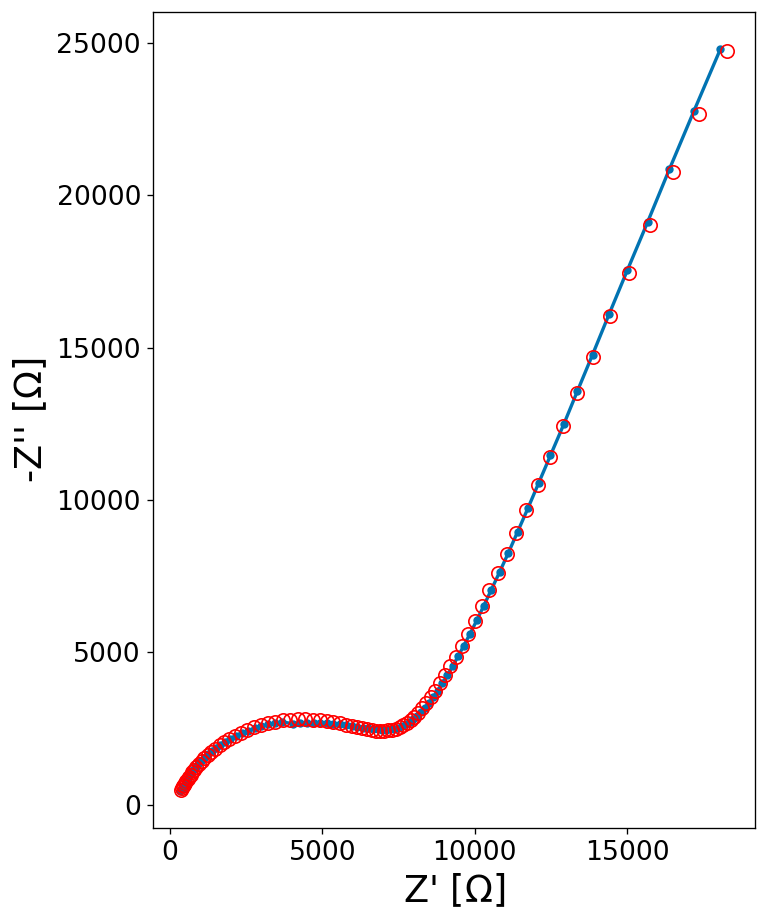

file      fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_104_10_30.mpt  147.872064  6797.82864  0.785315      NaN  9.641525e-09   

         fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  90279.945553     1.0      NaN  1.963388e-07  0.000002  0.594169  
['DE_104_10_30orig.mpt']


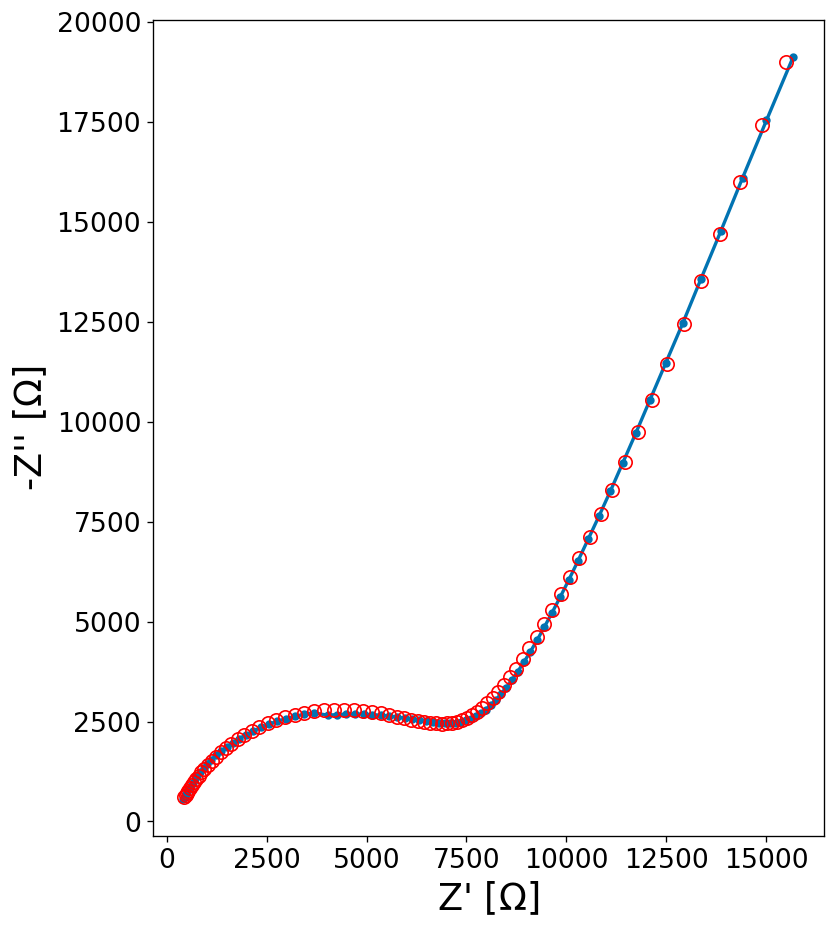

file      fit_Rs       fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_104_10_30orig.mpt  125.498416  7643.871965  0.451044      NaN  0.000008   

        fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  6374.255327  0.799731      NaN  8.437442e-09  2.907191e-07  0.812629  
['DE_104_1_30.mpt']


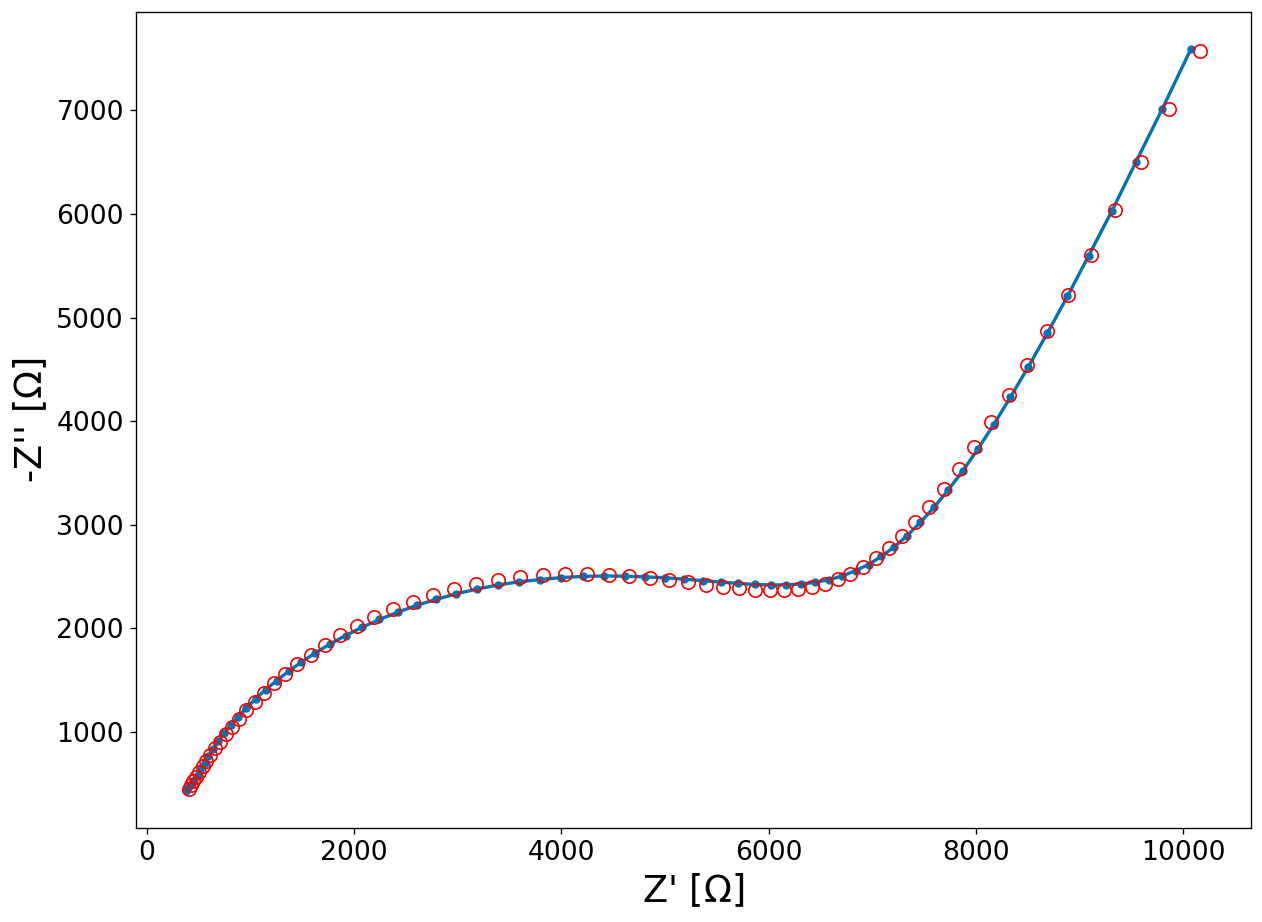

file      fit_Rs        fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_104_1_30.mpt  186.639498  25189.939552     1.0      NaN  2.826227e-07   

        fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  6193.804658  0.762958      NaN  1.406941e-08  9.430367e-07  0.640305  
['DE_104_1_30_trimmed.mpt']


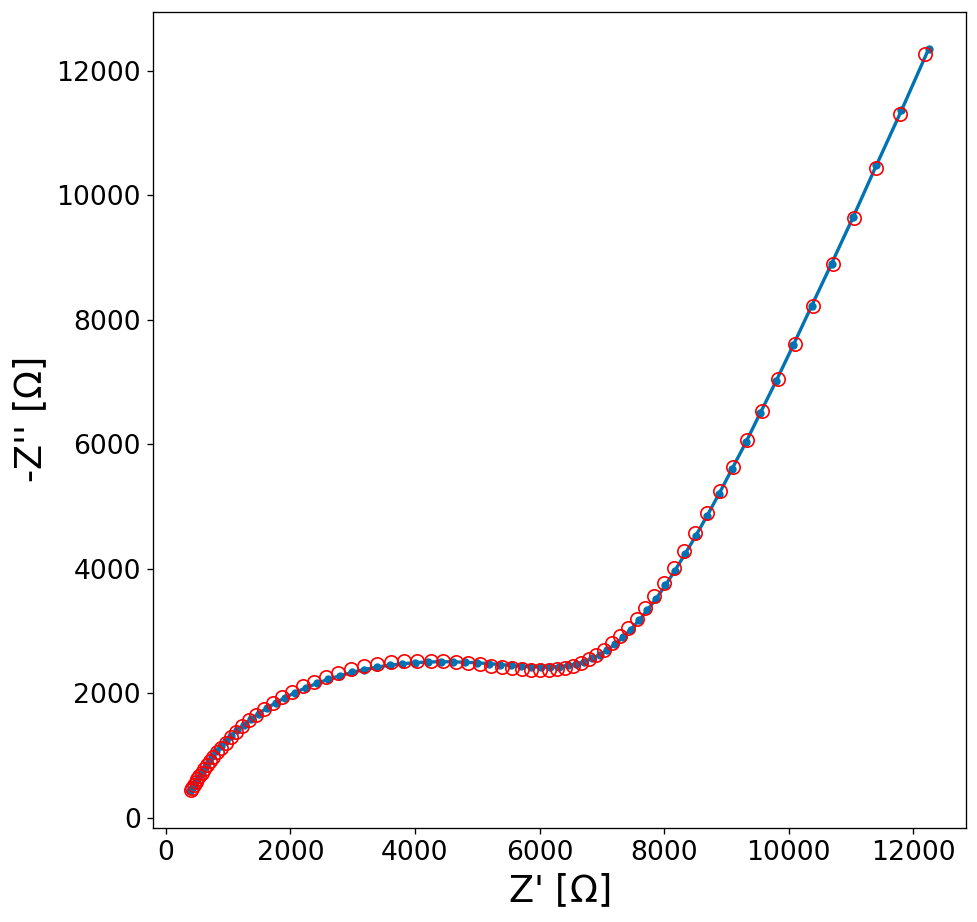

file      fit_Rs       fit_R1   fit_n1  fit_fs1  \
0  DE_104_1_30_trimmed.mpt  184.084299  6046.313531  0.76782      NaN   

         fit_Q1       fit_R2    fit_n2  fit_fs2    fit_Q2        fit_Q3  \
0  1.341579e-08  61227.83075  0.594721      NaN  0.000001  1.387531e-07   

     fit_n3  
0  0.999995  
['DE_140_1_30.mpt']


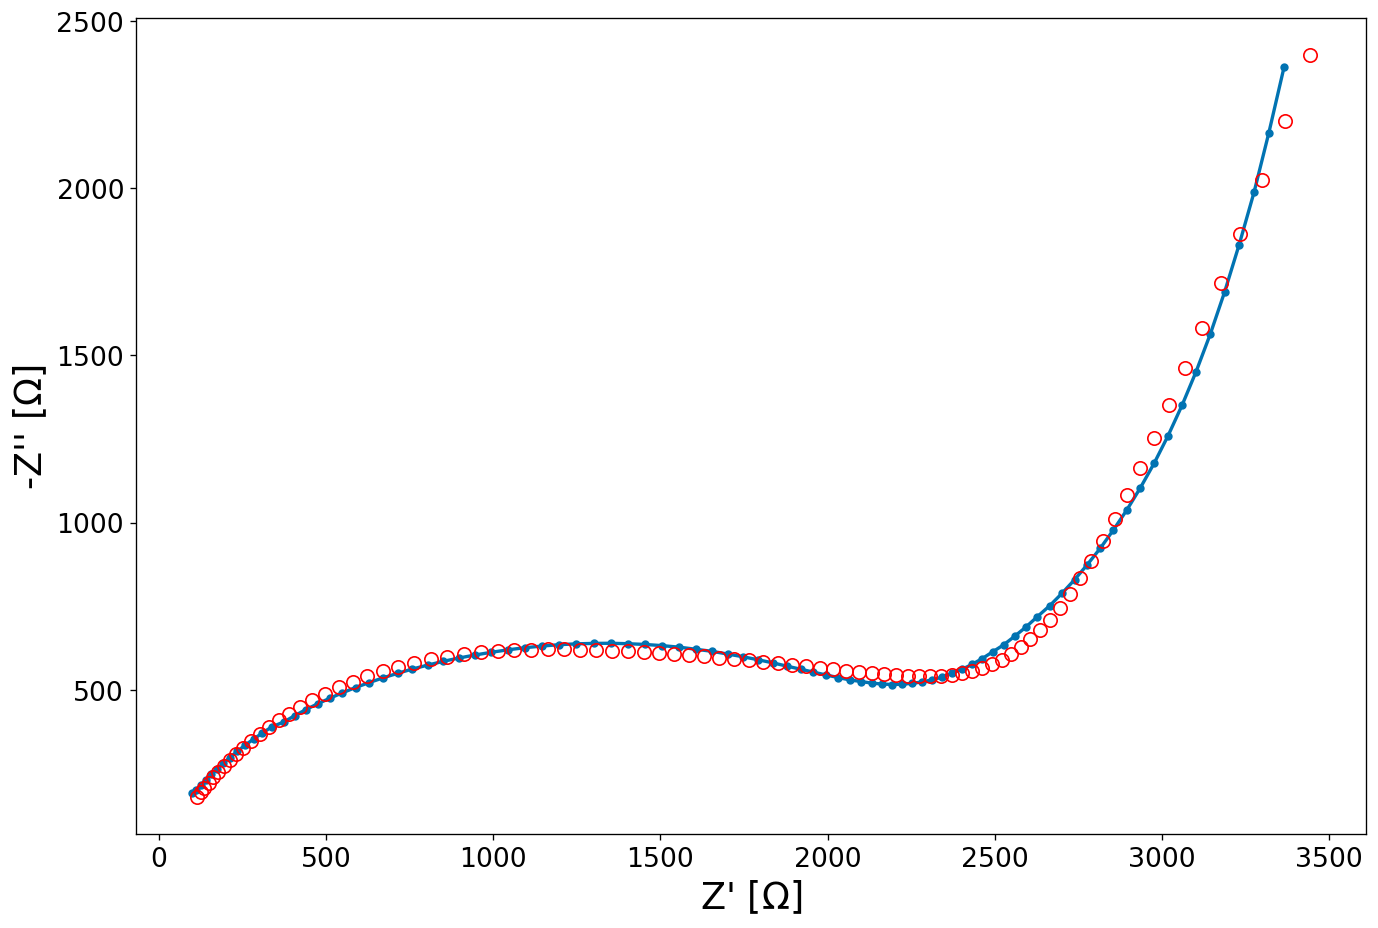

file    fit_Rs       fit_R1   fit_n1  fit_fs1        fit_Q1  \
0  DE_140_1_30.mpt  0.097885  1120.484047  0.74405      NaN  5.603593e-08   

        fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  1559.727004  0.596135      NaN  0.000001  0.000005  0.783775  
['DE_40_10_60.mpt']


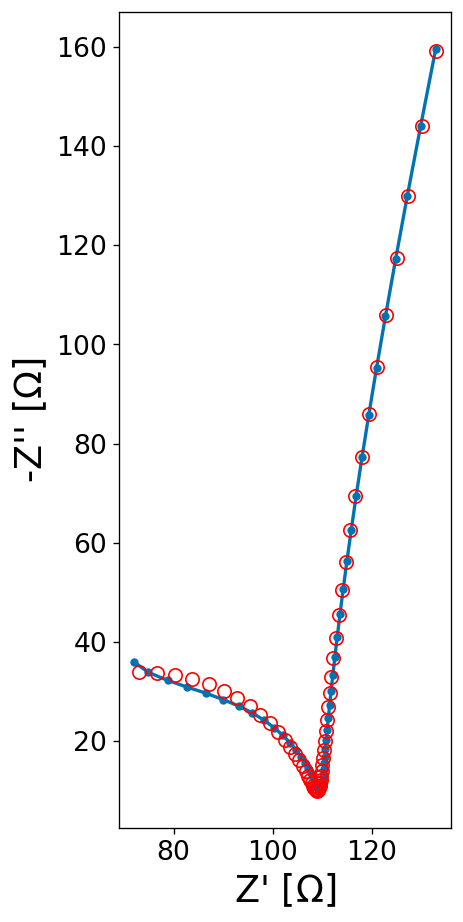

file     fit_Rs    fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_10_60.mpt  37.870126  80.02778  0.913438      NaN  0.000005   

      fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  71.550338  0.958512      NaN  4.346563e-09  7.860509e-07  0.999998  
['DE_40_11_60.mpt']


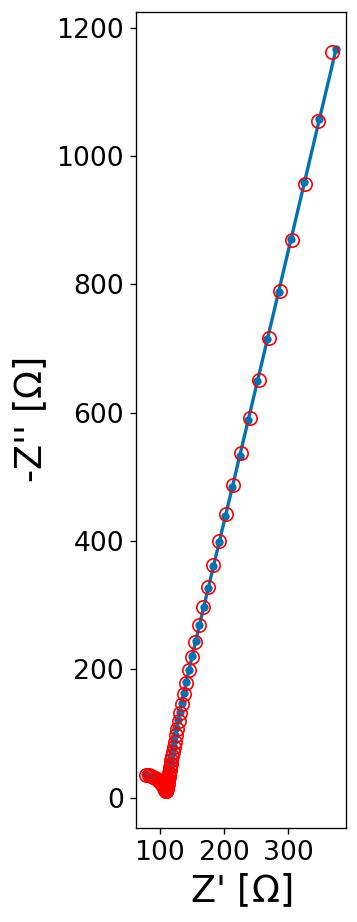

file     fit_Rs      fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_11_60.mpt  39.445841  183.211042  0.876614      NaN  0.000009   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  69.554149     1.0      NaN  2.259413e-09  0.000001  0.914617  
['DE_40_12_60.mpt']


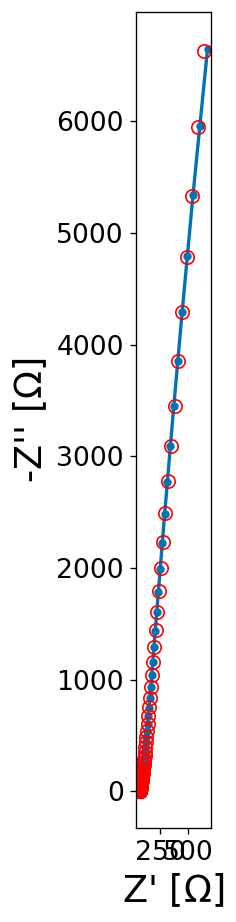

file     fit_Rs     fit_R1   fit_n1  fit_fs1    fit_Q1  \
0  DE_40_12_60.mpt  46.282546  16.820926  0.94013      NaN  0.000016   

      fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  24.565292  0.997618      NaN  7.681722e-09  0.000002  0.946469  
['DE_40_13_60.mpt']


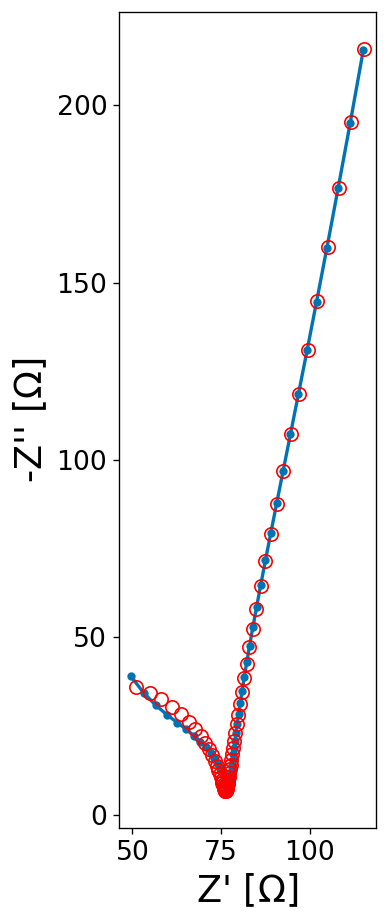

file    fit_Rs     fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_40_13_60.mpt  0.049487  75.870376     1.0      NaN  1.462816e-09   

     fit_R2  fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  14.26072     1.0      NaN  0.000011  0.000002  0.911413  
['DE_40_14_60.mpt']


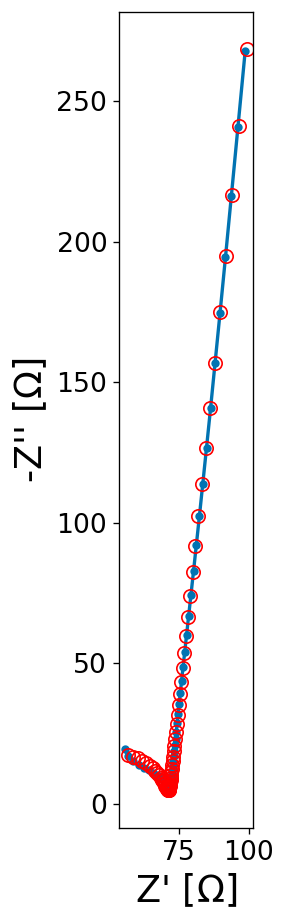

file     fit_Rs     fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_40_14_60.mpt  35.811504  34.503821     1.0      NaN  3.681278e-09   

     fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  1.027332     1.0      NaN  8.123112e-07  0.000002  0.933653  
['DE_40_15_60.mpt']


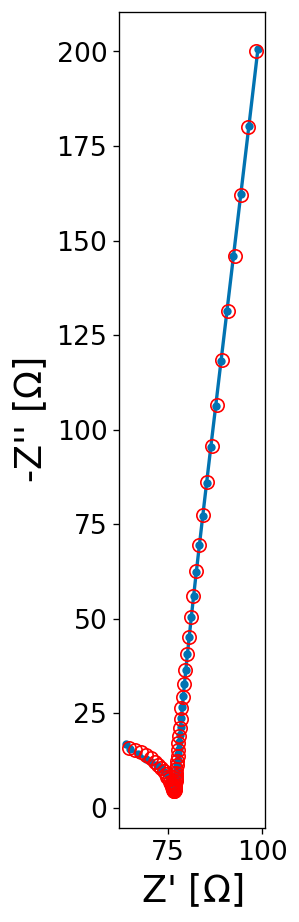

file     fit_Rs     fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_40_15_60.mpt  44.686688  31.975477     1.0      NaN  4.340202e-09   

      fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  25.792903  0.915985      NaN  0.000016  0.000001  0.975655  
['DE_40_1_30.mpt']
['DE_40_2_60.mpt']


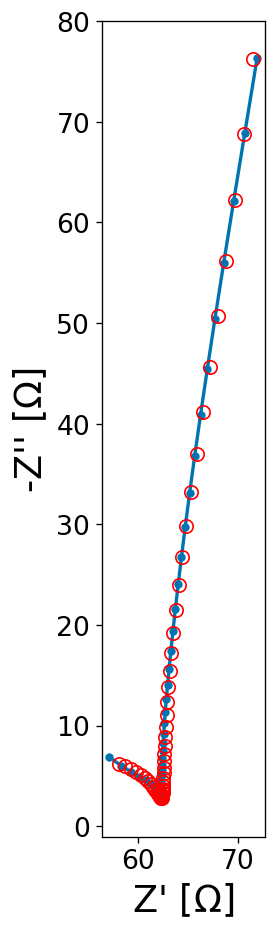

file     fit_Rs     fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_2_60.mpt  50.029326  15.864662  0.990403      NaN  0.000005   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  12.484504     1.0      NaN  1.315188e-08  0.000001  0.999999  
['DE_40_3_60.mpt']


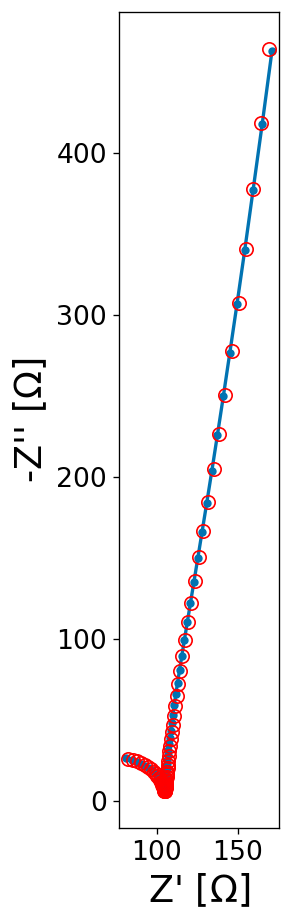

file     fit_Rs     fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_3_60.mpt  53.230164  46.643671  0.916258      NaN  0.000013   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  51.780814     1.0      NaN  3.037008e-09  0.000002  0.957125  
['DE_40_4_60.mpt']


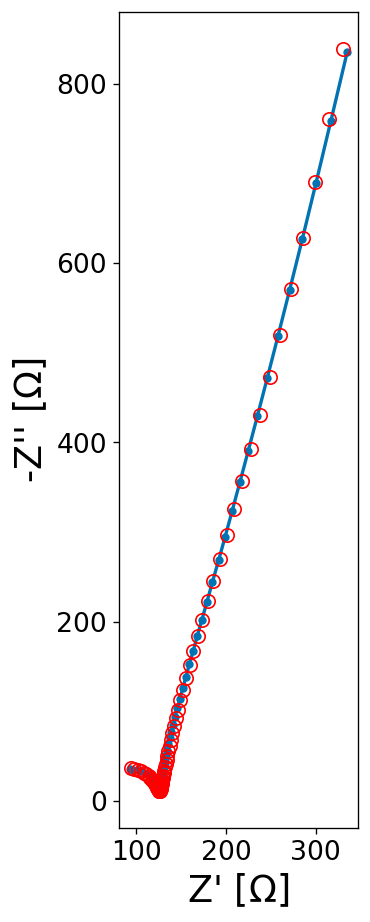

file     fit_Rs     fit_R1    fit_n1  fit_fs1   fit_Q1  \
0  DE_40_4_60.mpt  52.772473  86.744406  0.893565      NaN  0.00001   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  72.369513     1.0      NaN  3.068692e-09  0.000002  0.894077  
['DE_40_5_60.mpt']


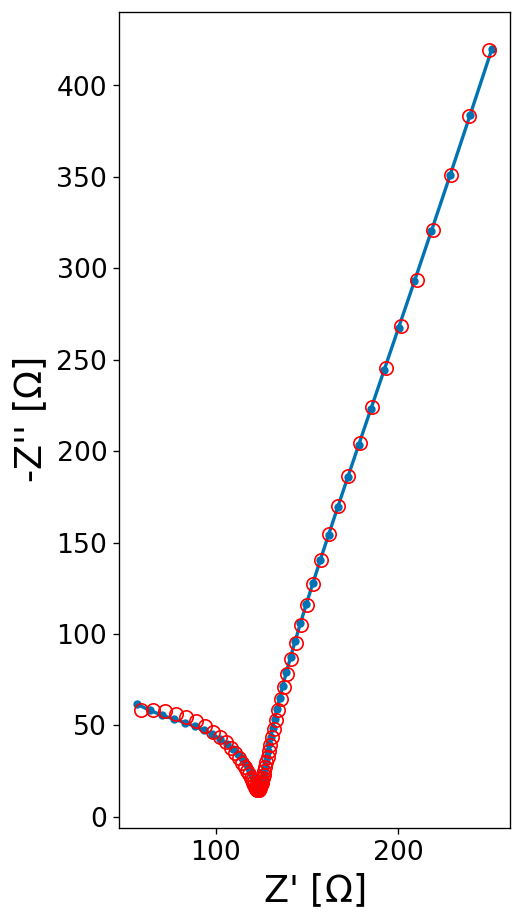

file    fit_Rs     fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_5_60.mpt  0.056863  88.899047  0.924726      NaN  0.000005   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  122.728639  0.962902      NaN  2.405216e-09  0.000002  0.886603  
['DE_40_6_60.mpt']


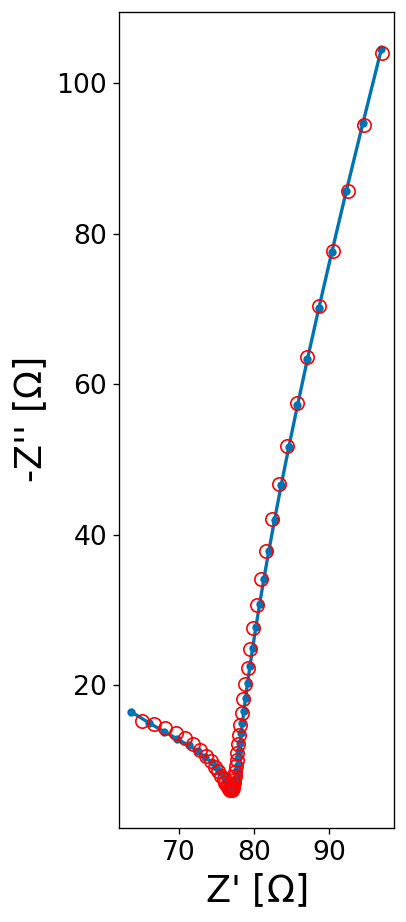

file     fit_Rs     fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_40_6_60.mpt  46.596651  30.473906     1.0      NaN  5.307135e-09   

      fit_R2    fit_n2  fit_fs2    fit_Q2        fit_Q3   fit_n3  
0  54.141432  0.924622      NaN  0.000004  9.132458e-07  0.99584  
['DE_40_7_60.mpt']


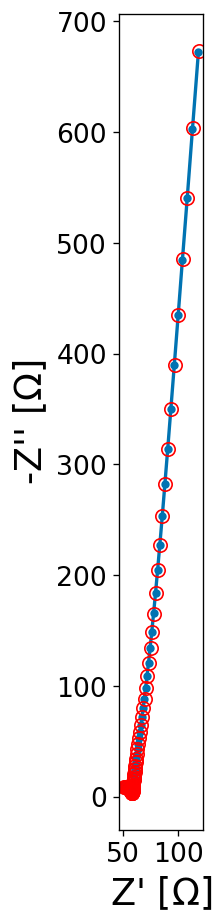

file     fit_Rs     fit_R1  fit_n1  fit_fs1        fit_Q1  \
0  DE_40_7_60.mpt  41.274711  17.369825     1.0      NaN  9.225474e-09   

     fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  9.006458  0.987179      NaN  0.000012  0.000002  0.951613  
['DE_40_8_60.mpt']


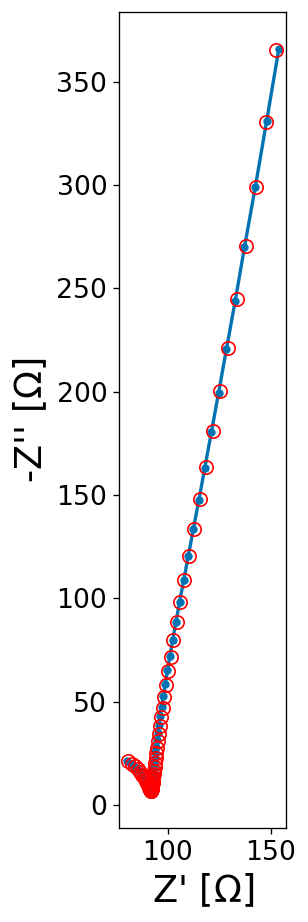

file     fit_Rs     fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_8_60.mpt  41.626832  56.570026  0.898692      NaN  0.000009   

      fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  50.181419     1.0      NaN  2.691548e-09  0.000001  0.953034  
['DE_40_9_60.mpt']


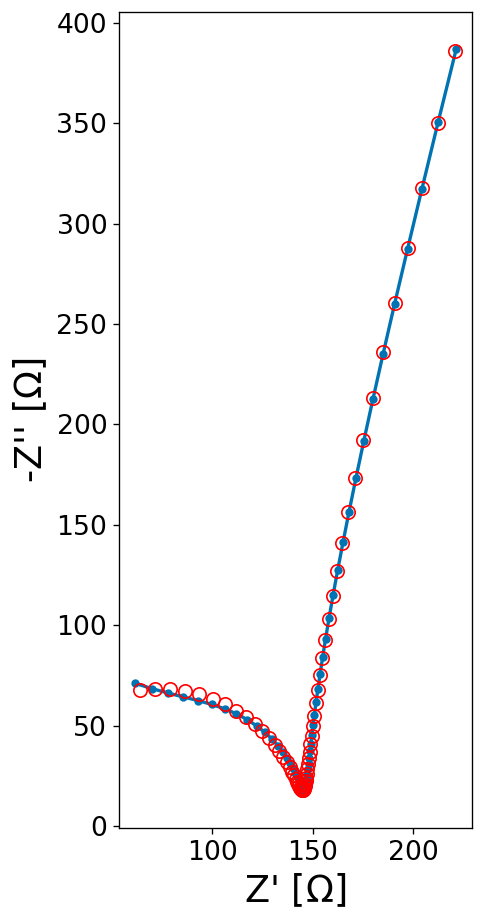

file    fit_Rs      fit_R1    fit_n1  fit_fs1    fit_Q1  \
0  DE_40_9_60.mpt  0.061502  139.547901  0.930802      NaN  0.000003   

       fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  145.225764  0.956243      NaN  2.464377e-09  8.921501e-07  0.956274  
['DE_49_1_30.mpt']
['DE_49_5_30.mpt']


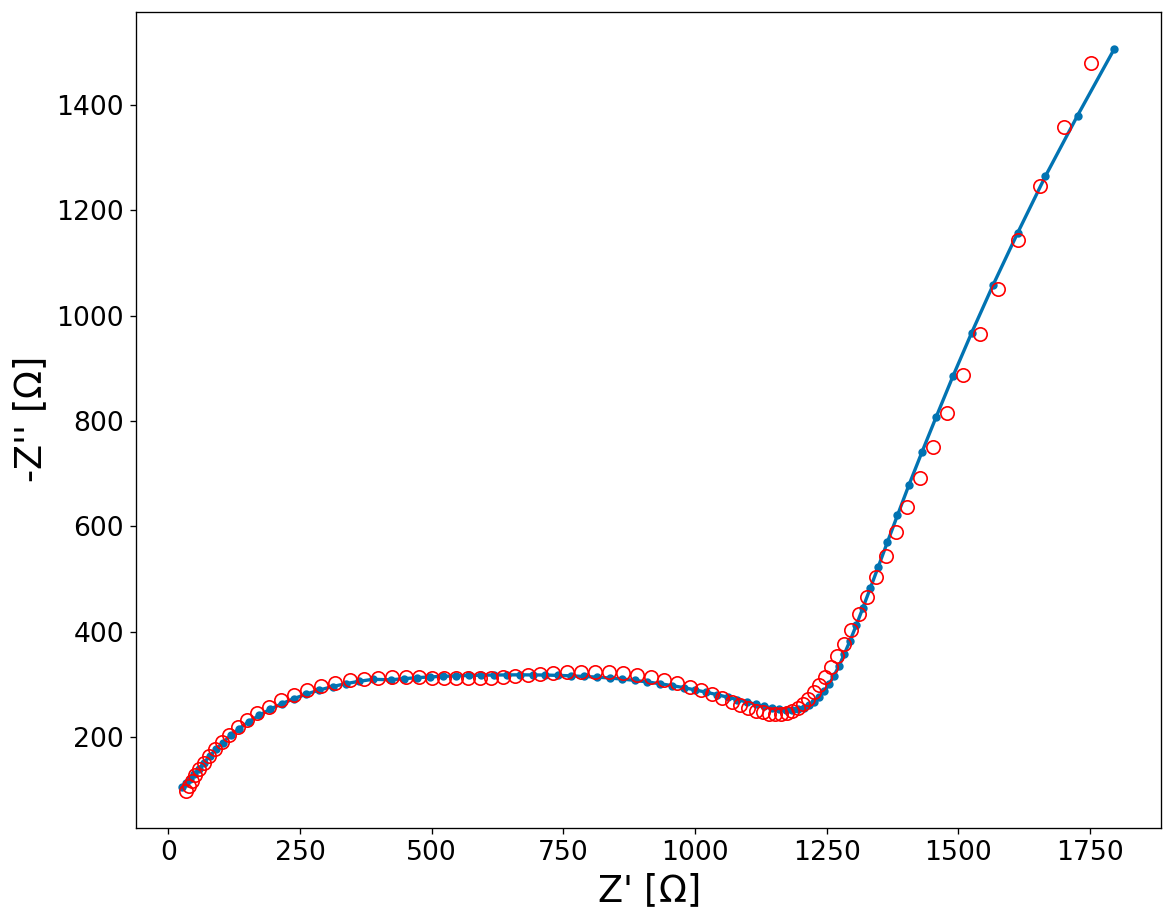

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_5_30.mpt  0.026666  570.072149  0.881413      NaN  1.072694e-08   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  590.952944  0.853443      NaN  1.353211e-07  0.000007  0.756629  
['DE_49_7_30.mpt']


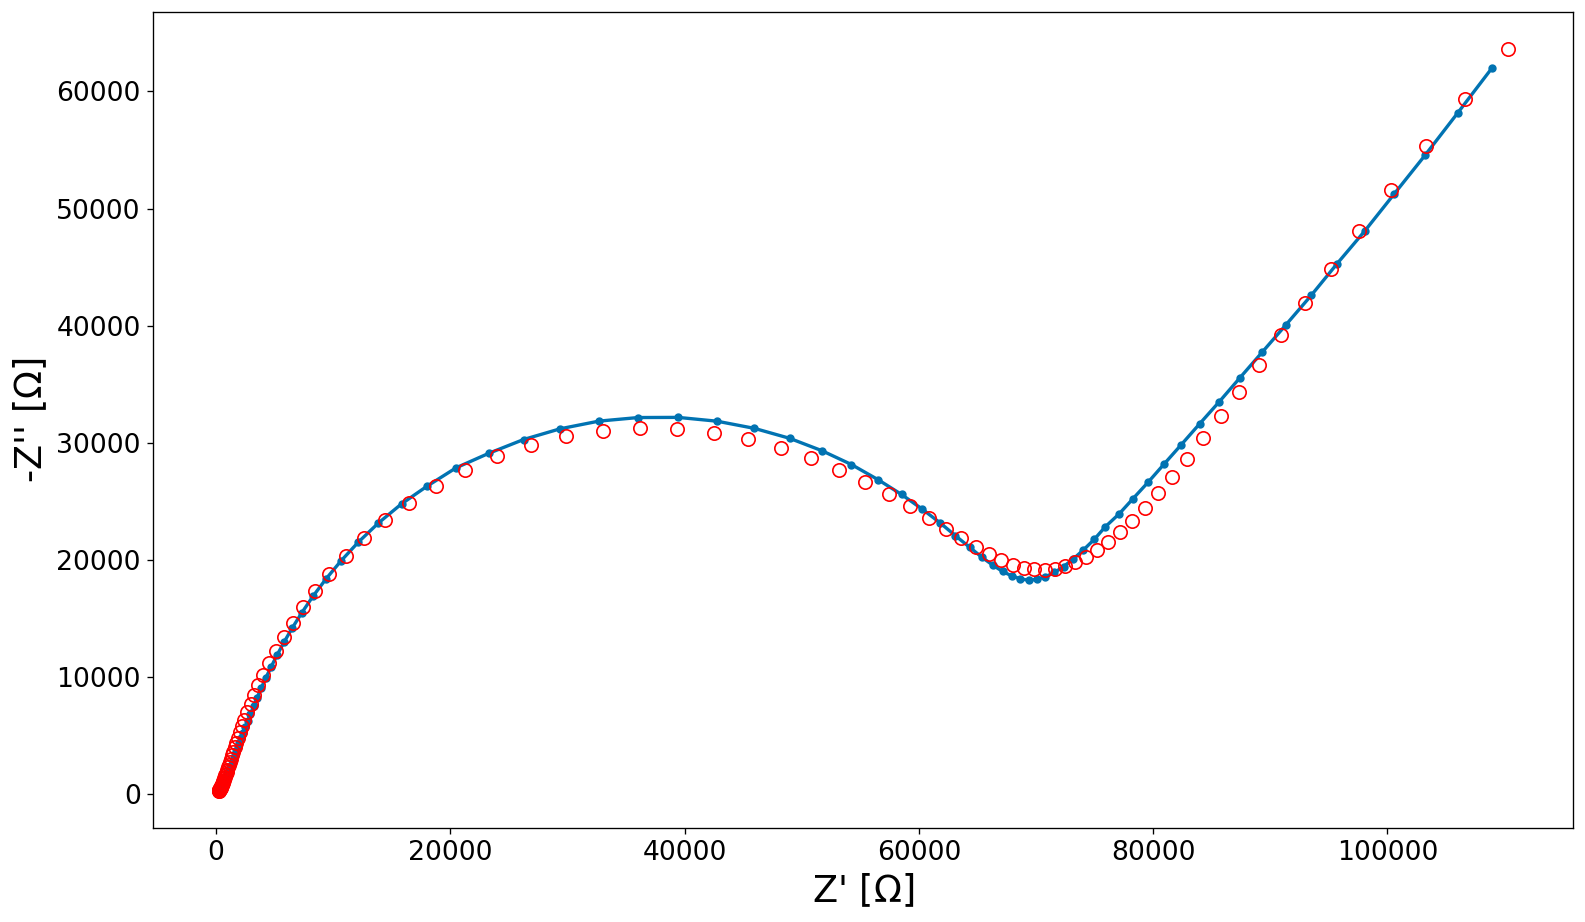

file    fit_Rs         fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_7_30.mpt  0.091074  115942.775012  0.971359      NaN  7.566677e-07   

         fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  60064.171935  0.937161      NaN  4.337898e-09  0.000004  0.437435  
['DE_49_8_30.mpt']


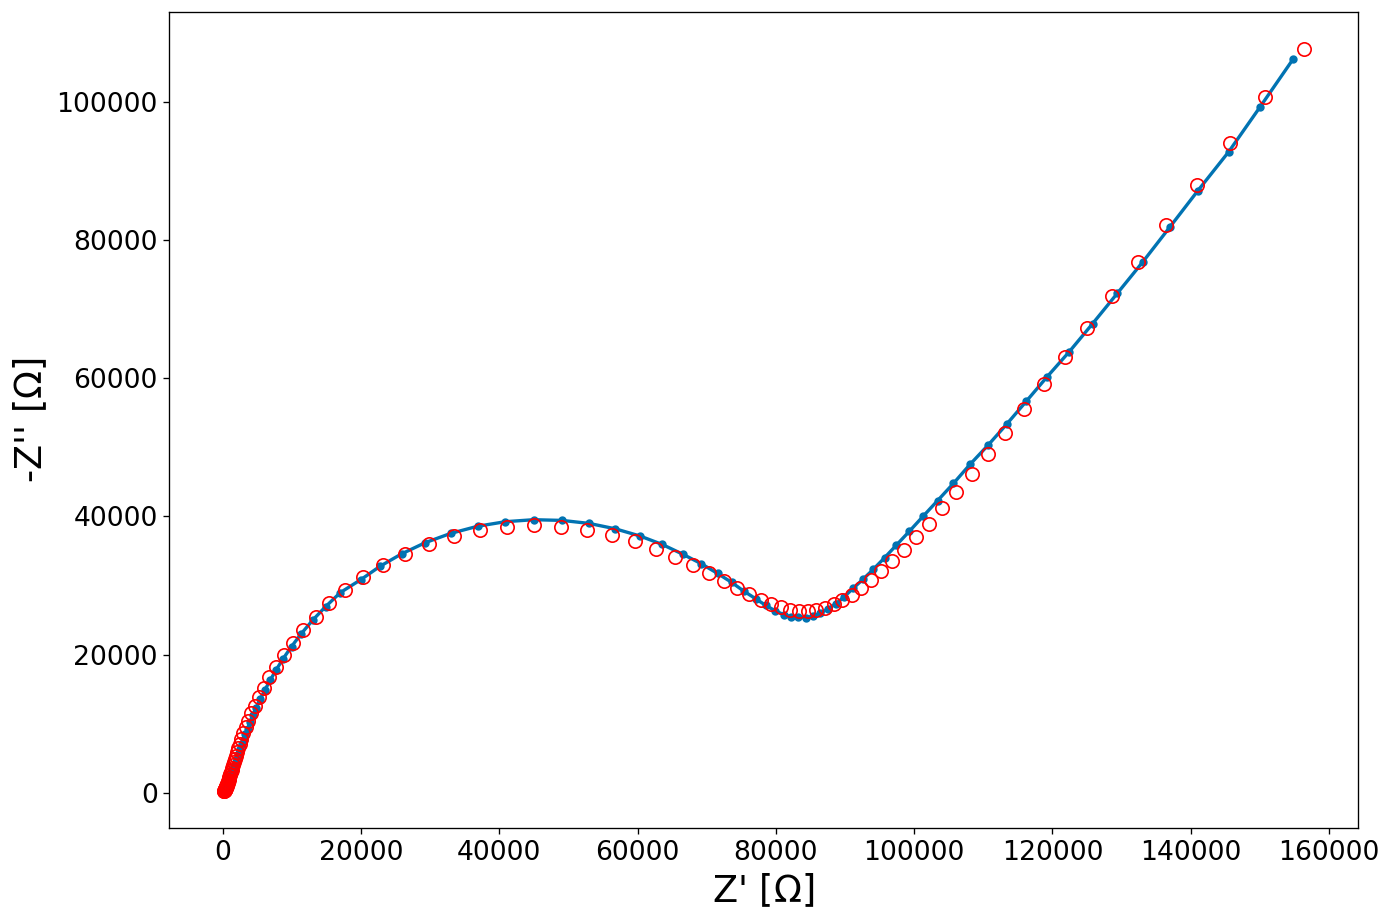

file    fit_Rs        fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_8_30.mpt  0.079685  70989.479574  0.950568      NaN  3.451432e-09   

          fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  309576.314089  0.868327      NaN  0.000001  0.000002  0.482772  
['DE_49_9_30.mpt']


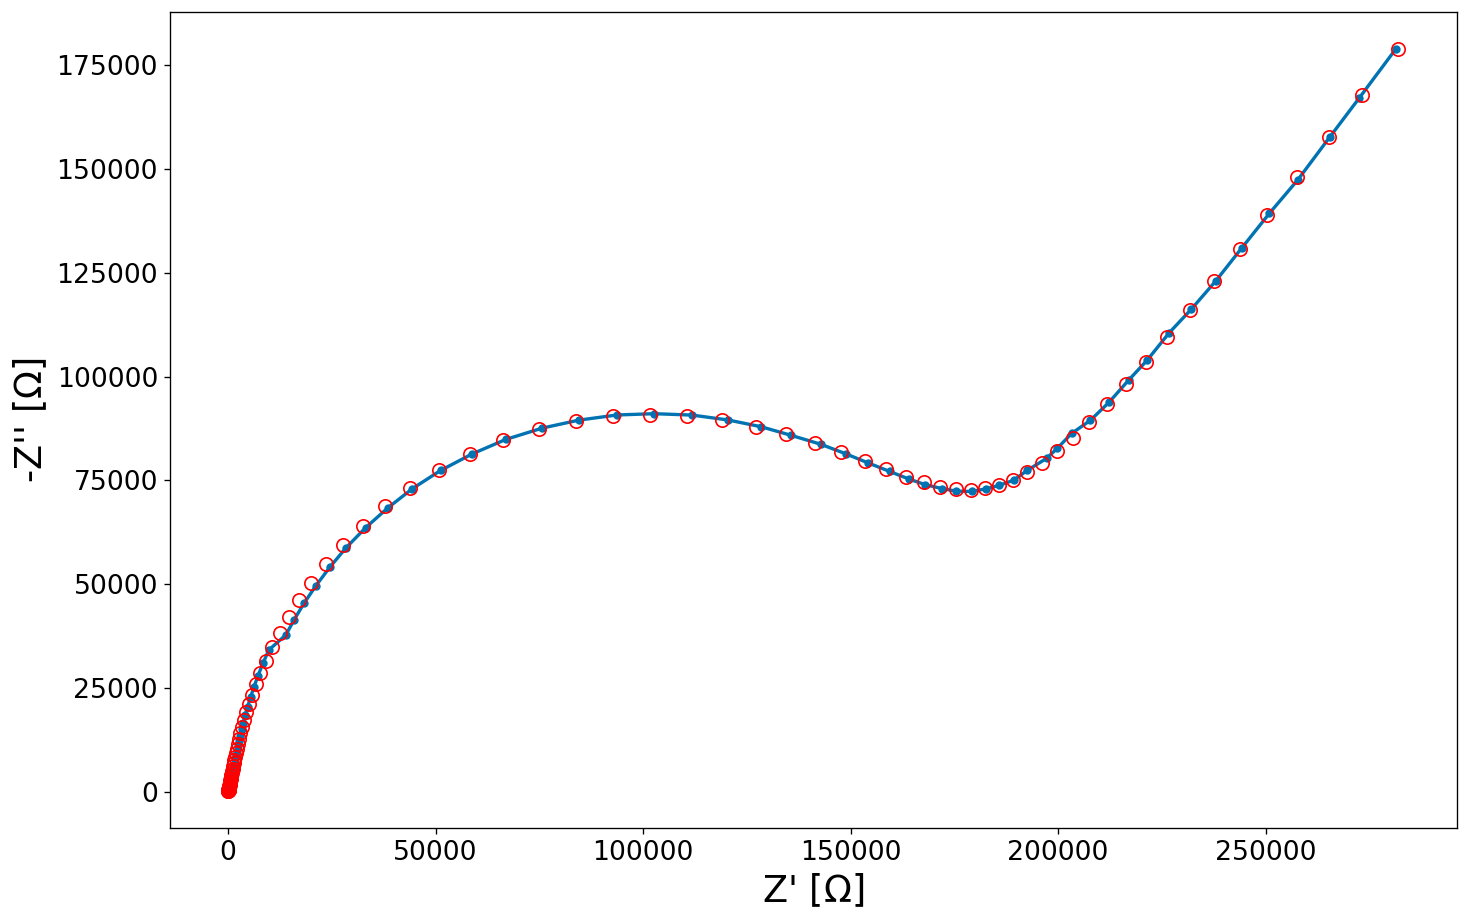

file    fit_Rs         fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_9_30.mpt  0.032985  161559.464158  0.960988      NaN  2.304394e-09   

          fit_R2    fit_n2  fit_fs2        fit_Q2        fit_Q3    fit_n3  
0  484450.442588  0.645466      NaN  3.277465e-07  2.500033e-07  0.946677  
['DE_57_6_60.mpt']


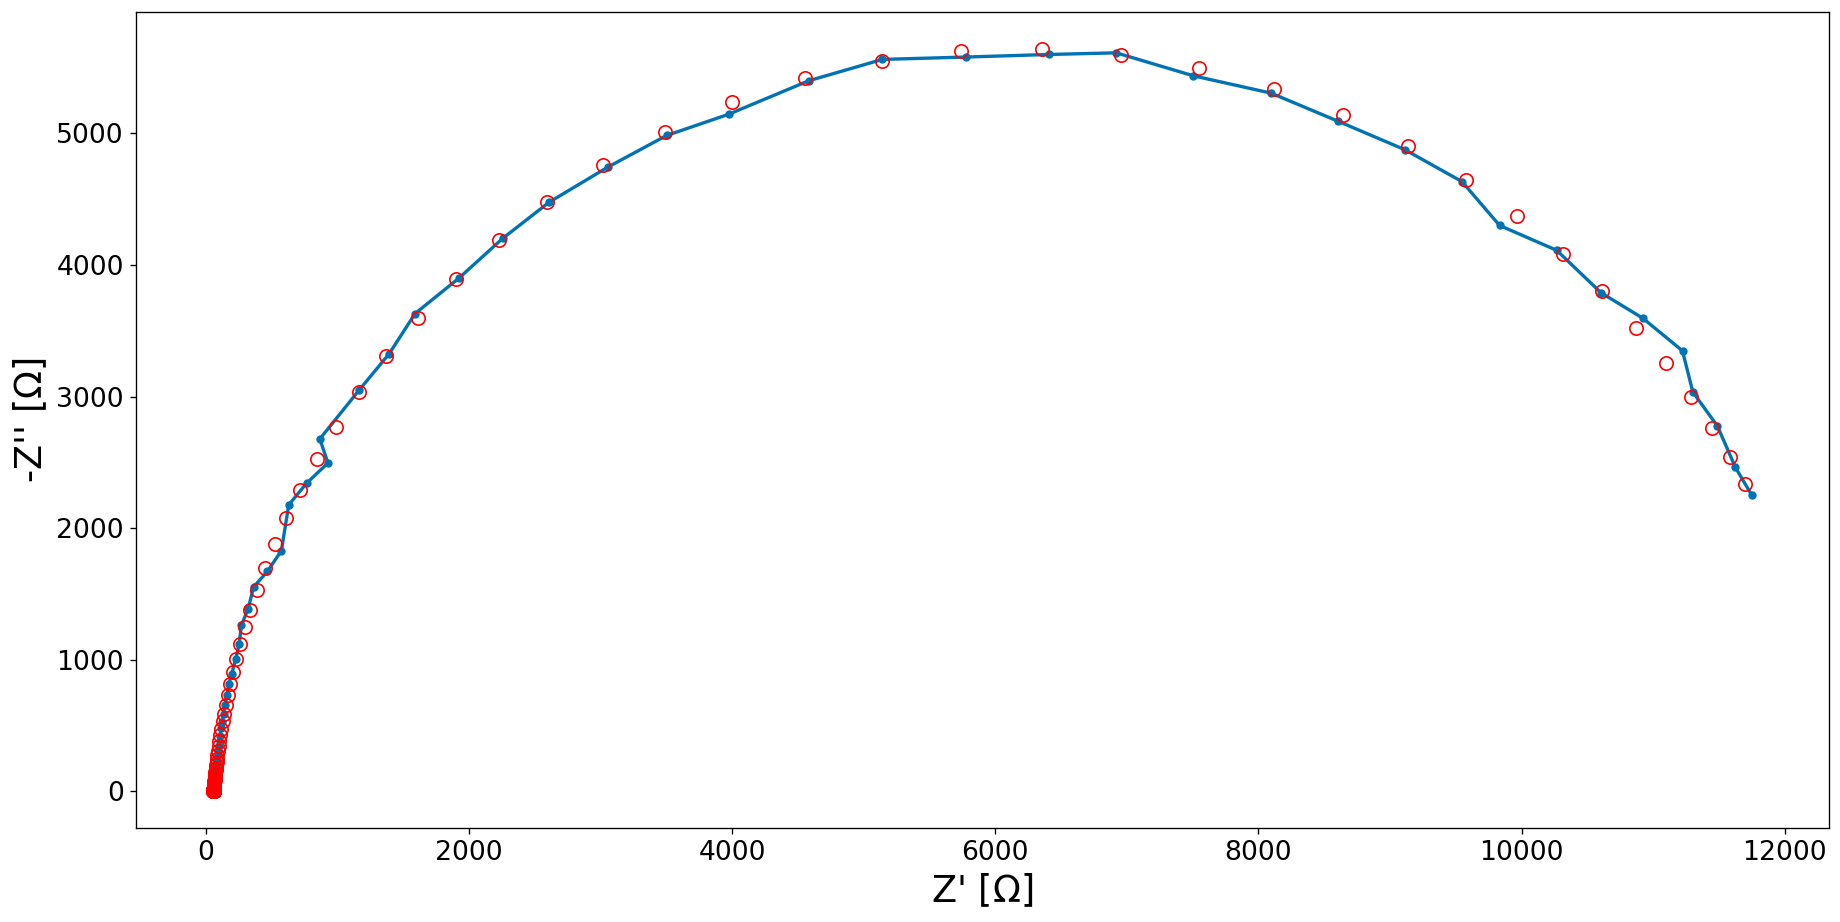

file     fit_Rs     fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_57_6_60.mpt  39.216765  20.419894  0.999998      NaN  8.336684e-09   

         fit_R2    fit_n2  fit_fs2    fit_Q2  fit_Q3    fit_n3  
0  12199.397147  0.946089      NaN  0.000003   0.001  0.901991  
['DE_65_10_60.mpt']
['DE_65_11_60.mpt']
['DE_65_12_60.mpt']
['DE_65_1_60.mpt']


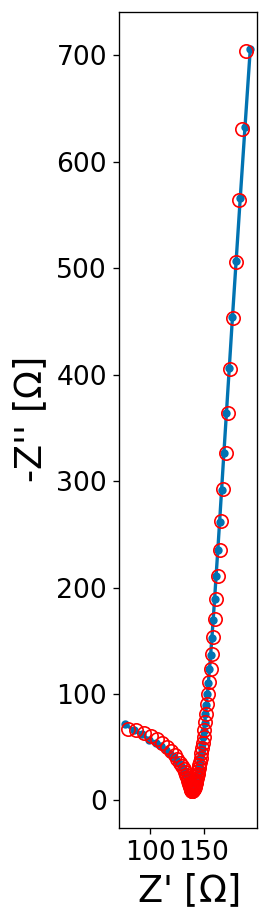

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_65_1_60.mpt  0.076228  135.859794  0.995403      NaN  1.073753e-09   

       fit_R2    fit_n2  fit_fs2  fit_Q2    fit_Q3    fit_n3  
0  271.757881  0.441725      NaN   0.001  0.000002  0.986858  
['DE_65_3_60.mpt']


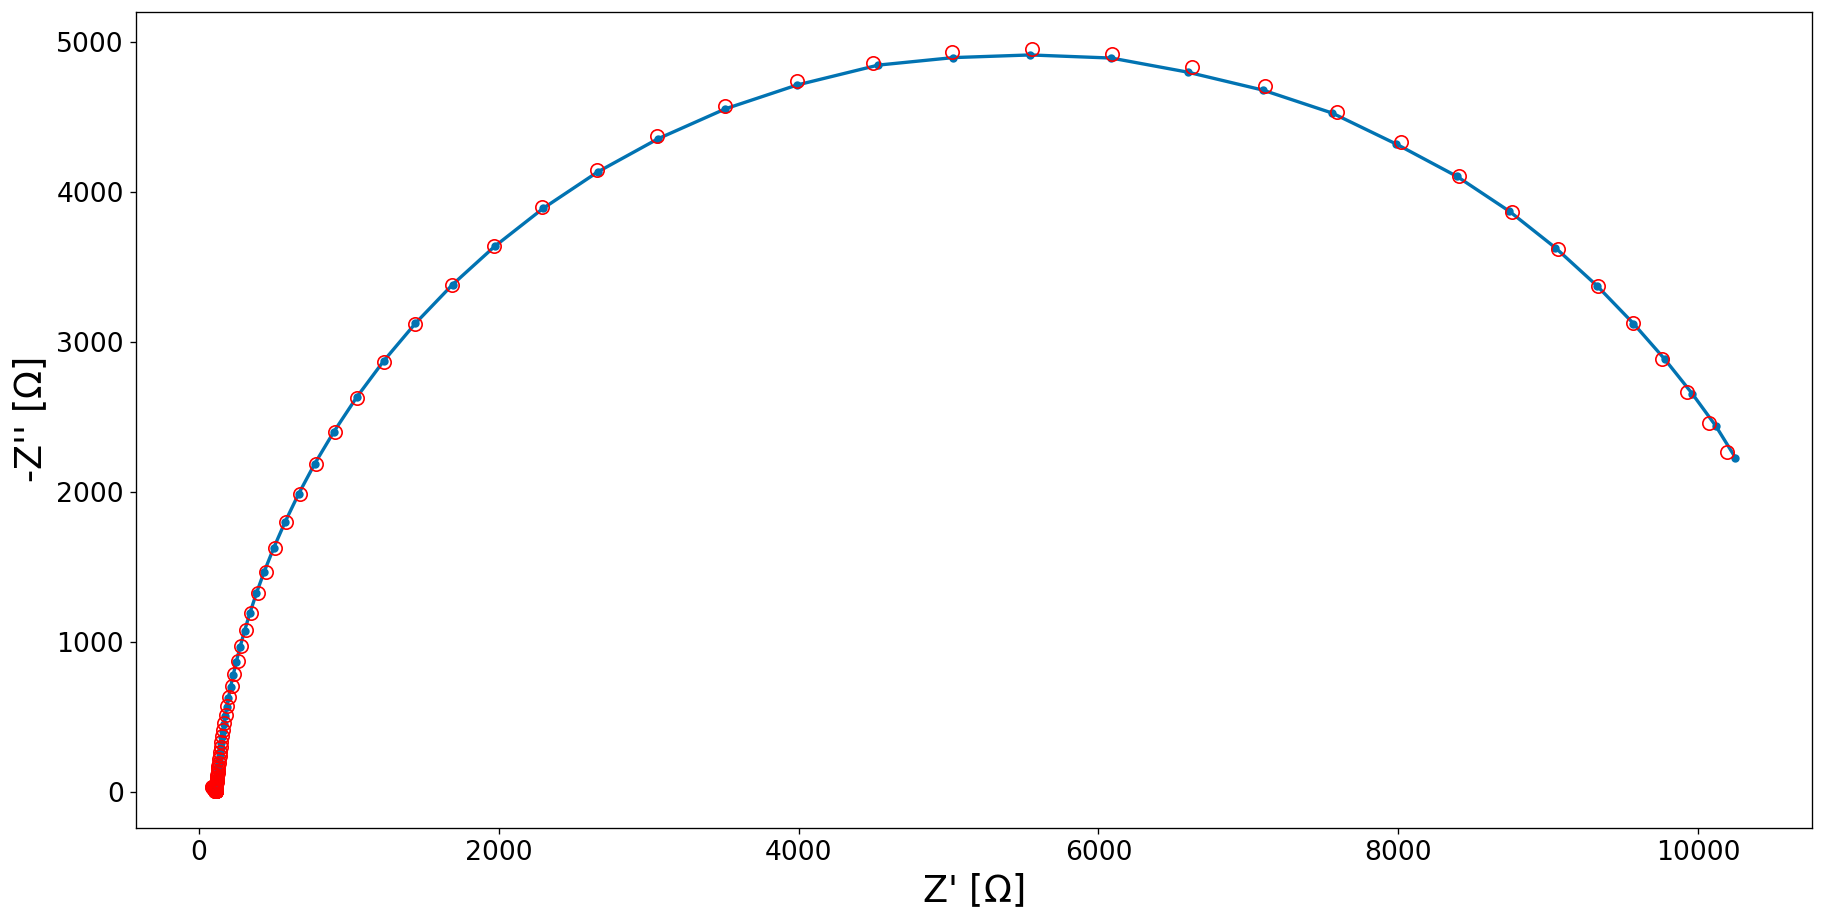

file     fit_Rs     fit_R1   fit_n1  fit_fs1        fit_Q1  \
0  DE_65_3_60.mpt  28.573281  83.296914  0.84119      NaN  1.334413e-08   

        fit_R2    fit_n2  fit_fs2    fit_Q2  fit_Q3  fit_n3  
0  10706.24913  0.946663      NaN  0.000003   0.001     1.0  
['DE_65_5_60.mpt']


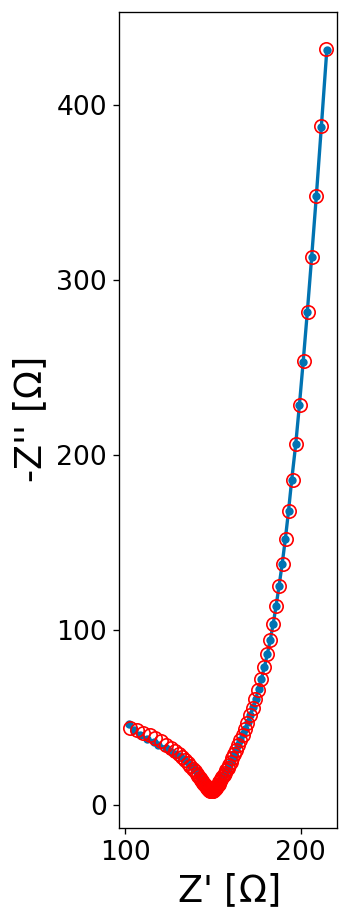

file     fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_65_5_60.mpt  22.503728  125.963854  0.800845      NaN  1.997679e-08   

      fit_R2    fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  51.815711  0.667364      NaN  0.000095  0.000008  0.967655  
['DE_65_7_60.mpt']


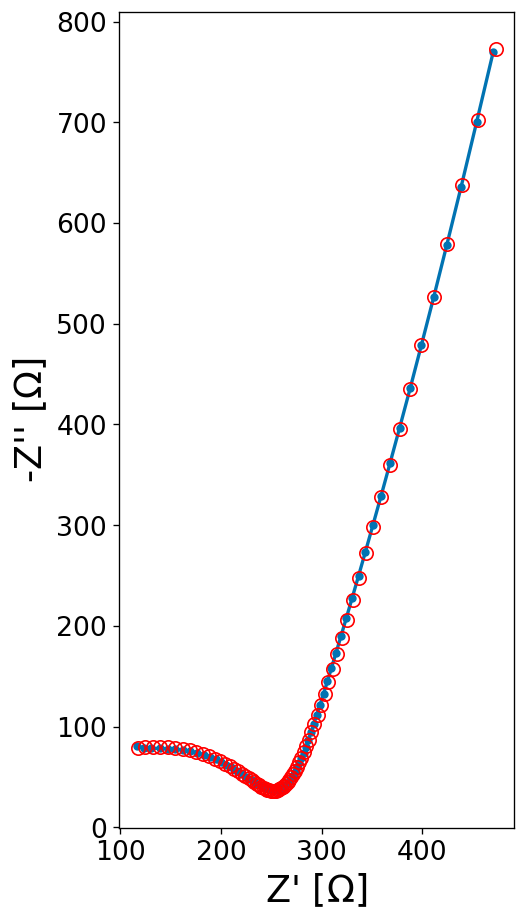

file     fit_Rs      fit_R1    fit_n1  fit_fs1  fit_Q1  \
0  DE_65_7_60.mpt  16.611501  126.106066  0.272293      NaN   0.001   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  212.550988  0.777225      NaN  3.043422e-08  0.000003  0.853336  
['DE_65_8_60.mpt']


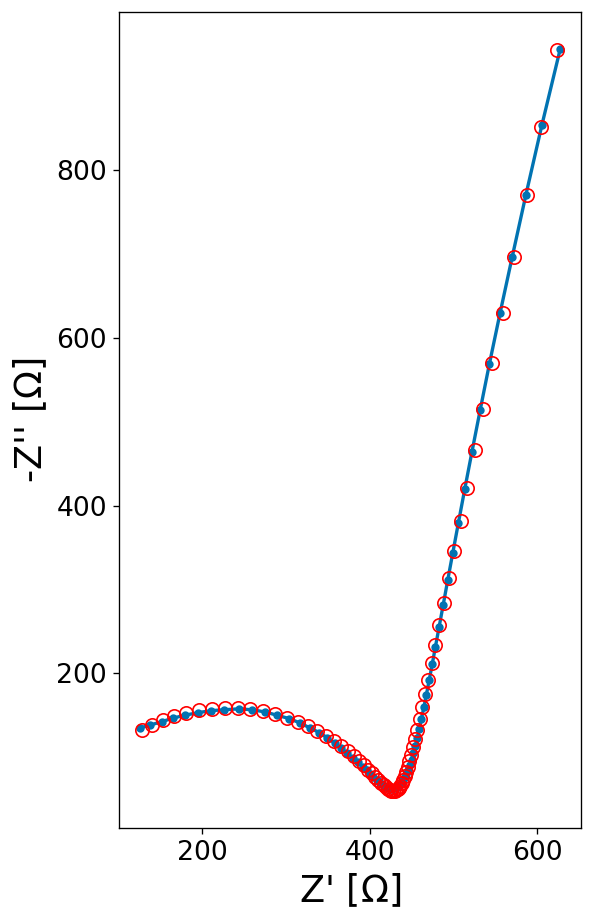

file     fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_65_8_60.mpt  22.188096  411.721941  0.826876      NaN  1.141873e-08   

   fit_R2  fit_n2  fit_fs2    fit_Q2    fit_Q3    fit_n3  
0  3130.0     1.0      NaN  0.000002  0.000002  0.852279  
['DE_65_9_60.mpt']


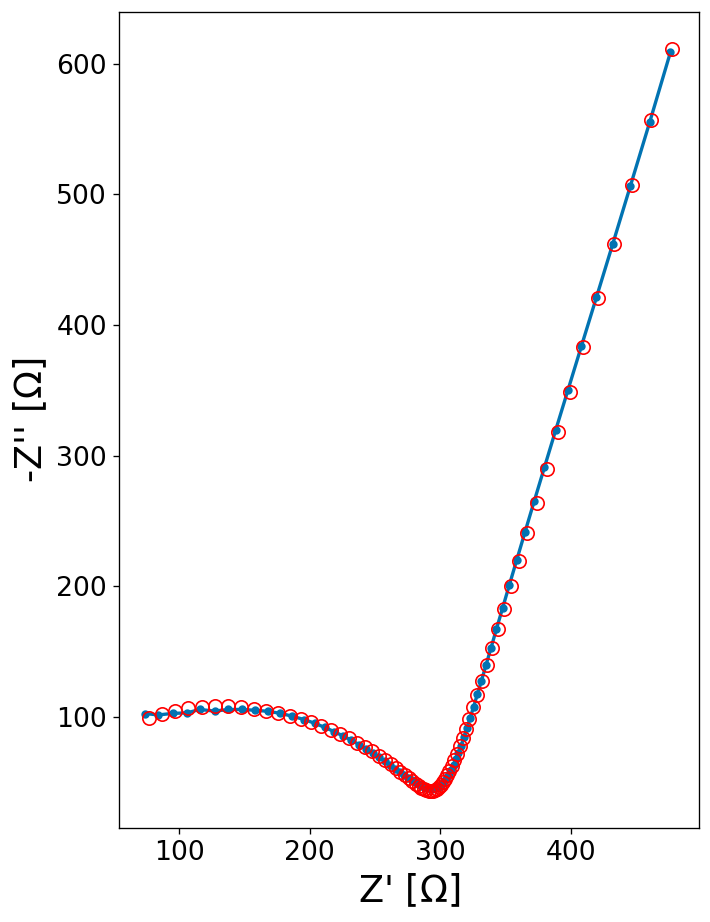

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_65_9_60.mpt  0.073999  183.469244  0.792894      NaN  6.982249e-08   

       fit_R2  fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  112.751726     1.0      NaN  1.637043e-09  0.000004  0.816075  
None


In [7]:
print(auto_fit(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', csv = csv, save_fig = True))

In [24]:
%%capture cap --no-stderr
print(auto_fit(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', csv = csv, save_fig = True))
with open('output.txt', 'w') as f:
    f.write(cap.stdout)